### Problem1:
* Perform Exponential Smoothing Forecast on the Honeywell stock prices to forecast the price for 04/16/2018.
* The given smoothing parameter(alpha) values are 0.15,0.35,0.55,0.75
* Calculate the Mean Squared Error(MSE) for each forecast

### KEY CONCEPTS

### Time Series: All the phenomenon whose behavior changes with time is called time series. The main idea of time series analysis is to decompose the original time series( sales, stock market trends, etc) into independent components. It is basically decomposed into 3 components. 
* trend: the overall direction of the series
* seasonality: Monthly, quarterly 
* residual: noise left over after the extraction of all the components

### Exponential Smoothing: 
* Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function
* Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time
* It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality
* Exponential smoothing is often used for analysis of time-series data

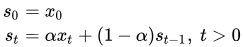

* where aplha is the smoothing parameter and 0<alpha<1



### STEP1: 
* Import all the required packages
* Upload the Honeywell csv file which has the dataset to be worked upon
* Read the csv file and store it in a Data Frame
* In the given dataset, we have the prices of stock from 2017-10-16 to 2018-04-13
* We need to forecast the stock price for 2018-04-16

In [37]:
#data extraction


#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import matplotlib.dates as mdates


my_data=pd.read_csv('honeywell1.csv',delimiter=',')
my_data.head()
my_data['Date']=pd.to_datetime(my_data['Date'])
my_data.head()



,Period,Date,Close,Volume
0,1,2017-10-16,143.750000,2001900.0
1,2,2017-10-17,143.429993,2435600.0
2,3,2017-10-18,143.440002,1734100.0
3,4,2017-10-19,143.619995,2623100.0
4,5,2017-10-20,145.350006,3369500.0


### STEP 2: Performing exponential smoothing
* Performing exponential smoothing, with alpha values 0.15,0.35,0.55,0.75 to forecast the stock price for 04-16-2018
* The first forecasted value will be same as the actual value
* The calculation begins from the second value
* Based on the above mentioned formula we calculate all the forecasted stock prices
* As the alpha value changes, the forecasted stock prices also change


In [69]:
def exponential_smoothing(series, alpha):
    result = np.array([])
    result=np.append(result,series[0]) # first value is same as series
    
    for n in range(1, len(series)):
        values=(alpha * series[n-1] + (1 - alpha) * result[n-1])
        result=np.append(result,values)
    return result
      
series=my_data['Close']
smoothing_number1=exponential_smoothing(series,0.15) 
smoothing_number2=exponential_smoothing(series,0.35)
smoothing_number3=exponential_smoothing(series,0.55)
smoothing_number4=exponential_smoothing(series,0.75)
estimated_values=my_data.copy() 

estimated_values['SES0.15'] = smoothing_number1
estimated_values['SES0.35'] = smoothing_number2
estimated_values['SES0.55'] = smoothing_number3
estimated_values['SES0.75'] = smoothing_number4

estimated_values.tail()



,Period,Date,Close,Volume,SES0.15,SES0.35,SES0.55,SES0.75
120,121,2018-04-10,145.630005,2880400.0,145.095129,143.763095,143.346919,143.008280
121,122,2018-04-11,144.279999,1953100.0,145.175360,144.416513,144.602616,144.974574
122,123,2018-04-12,146.470001,2327600.0,145.041056,144.368733,144.425177,144.453643
123,124,2018-04-13,146.119995,1588500.0,145.255398,145.104177,145.549830,145.965911
124,125,2018-04-16,NaN,NaN,145.385088,145.459713,145.863421,146.081474


### Result: As we can see, for 04/16/2018 the forecasted stock price is as follows:
#### alpha(0.15)=145.38
#### alpha(0.35)= 145.45
#### alpha(0.55)= 145.86
#### alpha(0.75)= 146.08



### STEP 3: Calculating Mean Squared Error
* For calculating the MSE we need to find the error which is the difference between observed value and forecasted value
* The next step is to take the absolute values of the error
* Now, we need to square the absolute error values and take the average of the values. The resulting value is MSE


In [70]:
from sklearn.metrics import mean_squared_error

mse_result=np.array([])
y_true = estimated_values.loc[0:123, ['Close']]
y_pred1 = estimated_values.loc[0:123, ['SES0.15']]
y_pred2 = estimated_values.loc[0:123, ['SES0.35']]
y_pred3 = estimated_values.loc[0:123, ['SES0.55']]
y_pred4 = estimated_values.loc[0:123, ['SES0.75']]

a=mean_squared_error(y_true, y_pred1)
b=mean_squared_error(y_true, y_pred2)
c=mean_squared_error(y_true, y_pred3)
d=mean_squared_error(y_true, y_pred4)

mse_list=[a,b,c,d]
    
mse_list   


[7.907416599515166, 4.505511481669807, 3.3853274759737038, 2.9539602702372743]

### Result: The following are respective MSE values for different smoothing parameters
#### alpha(0.15)=7.90
#### alpha(0.35)= 4.50
#### alpha(0.55)= 3.85
#### alpha(0.75)= 2.95

### When α is close to 1, dampening is quick and when α is close to 0, dampening is slow. Hence, we choose the best value for α so the value which results in the smallest MSE.

### From these obtained MSE values, we can say that when alpha value is 0.75 we get the least MSE value. Hence alpha=0.75 gives the accurate forecast value of stock price for 04-16-2018


### CONCLUSION: Based on the forecasted values and best smoothing parameter(alpha=0.75) we can say that the price of stock on 04-16-2018 will be 146.08